In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.shape

(11251, 15)

In [9]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [18]:
df[['Age','Marital_Status','Orders']].describe()

,Age,Marital_Status,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,2.489634
std,12.753866,0.493589,1.114967
min,12.000000,0.000000,1.000000
25%,27.000000,0.000000,2.000000
50%,33.000000,0.000000,2.000000
75%,43.000000,1.000000,3.000000
max,92.000000,1.000000,4.000000


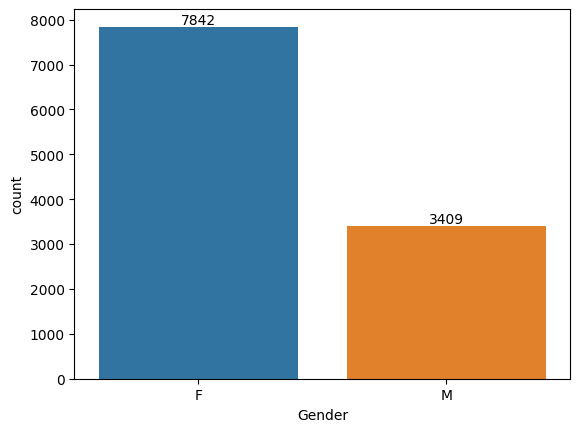

In [6]:
#Exploratory Data Analysis
ax = sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

From the above graph we can tell that most of the buyers are women

<AxesSubplot: xlabel='Gender', ylabel='Amount'>

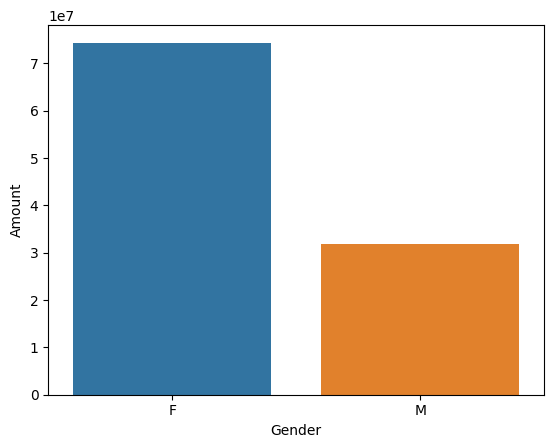

In [14]:
#plotting a graph for amount vs gender
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From the above graph we can tell that women spend more money

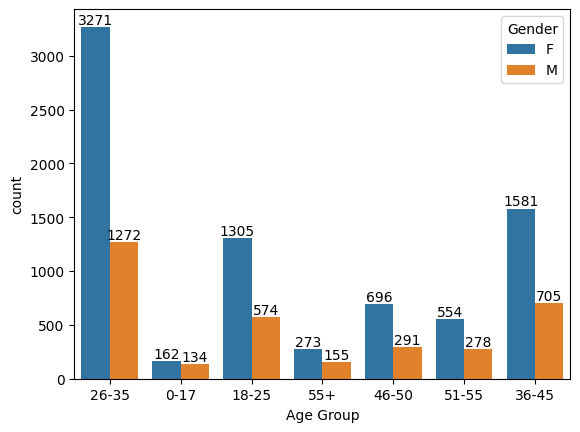

In [15]:
#plotting age vs amount graph
ax = sns.countplot(data=df, x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
    

This graph shows that women from the age of 26-35 buys the most

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

<AxesSubplot: xlabel='State', ylabel='Orders'>

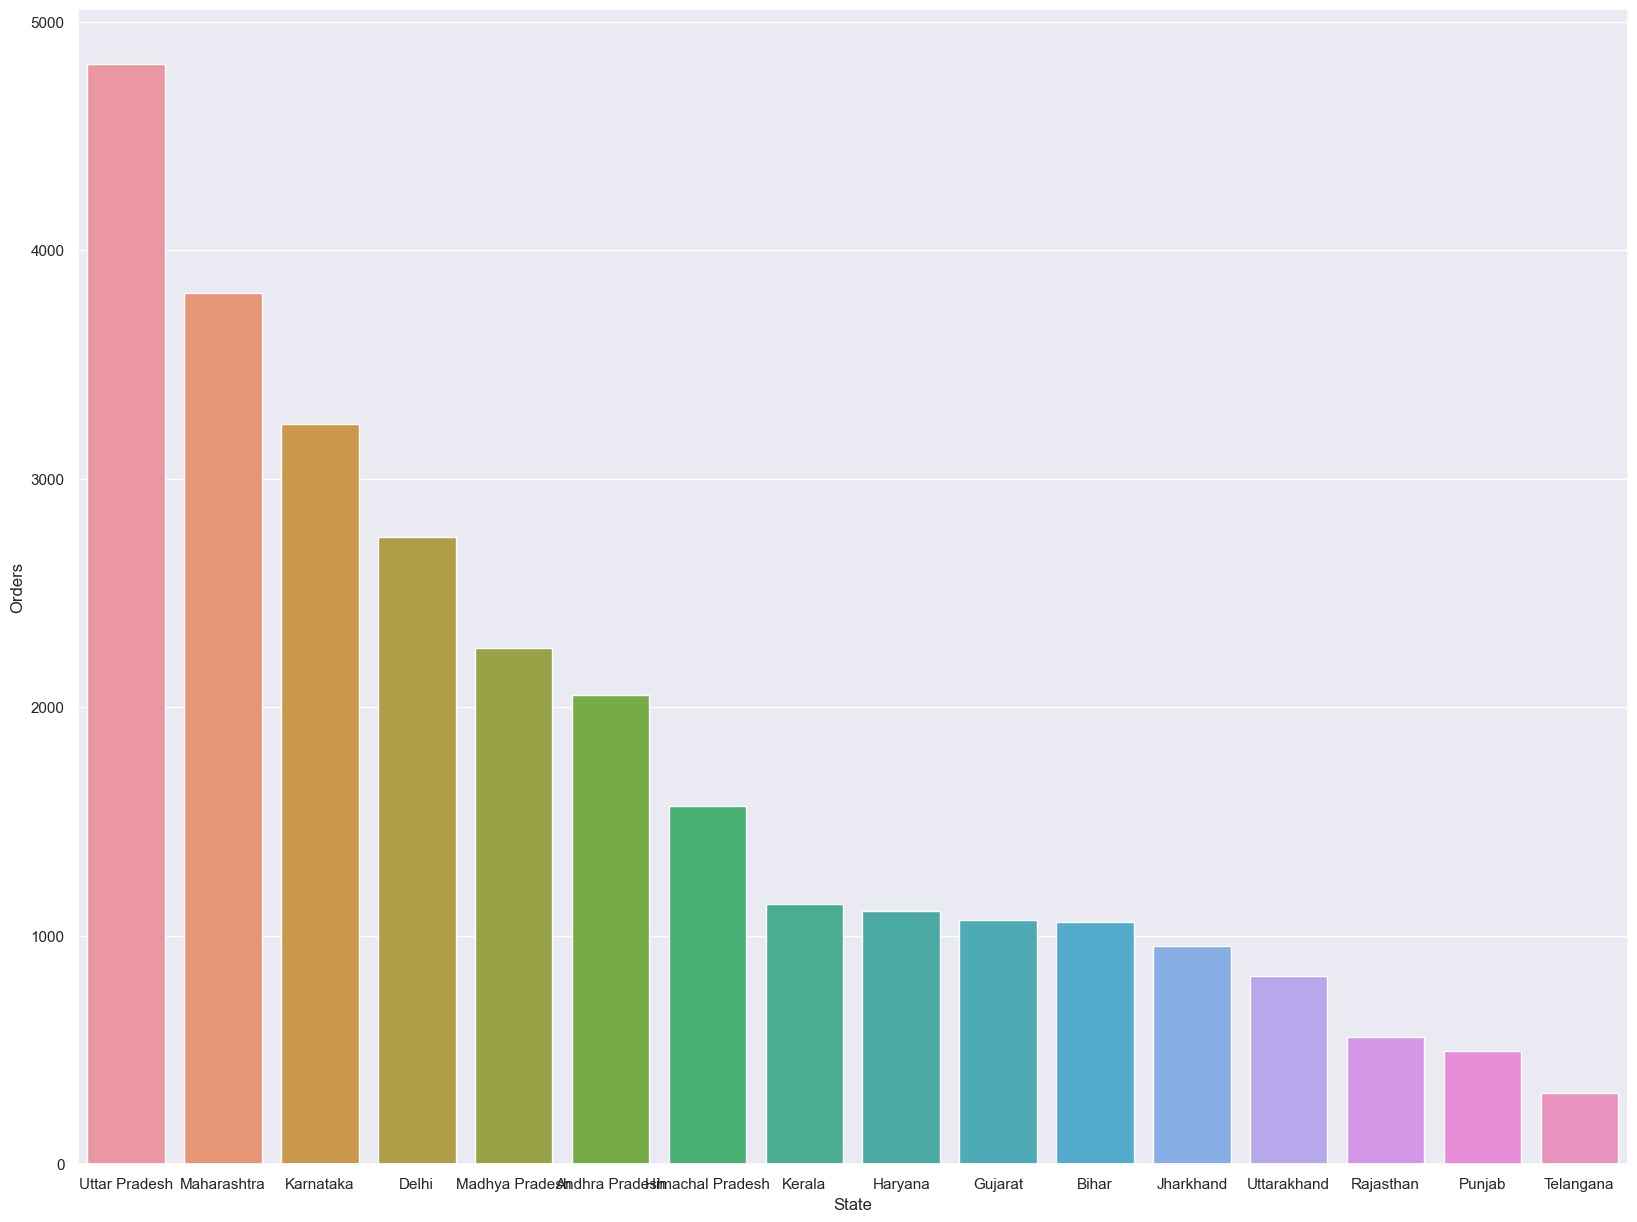

In [26]:
#plotting state vs order graph
ord_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(['Orders'],ascending = False)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x='State',y='Orders',data = ord_state)

This graph shows that people from Uttar Pradesh , Maharashtra , Karnataka places thr most number of orders

<AxesSubplot: xlabel='State', ylabel='Amount'>

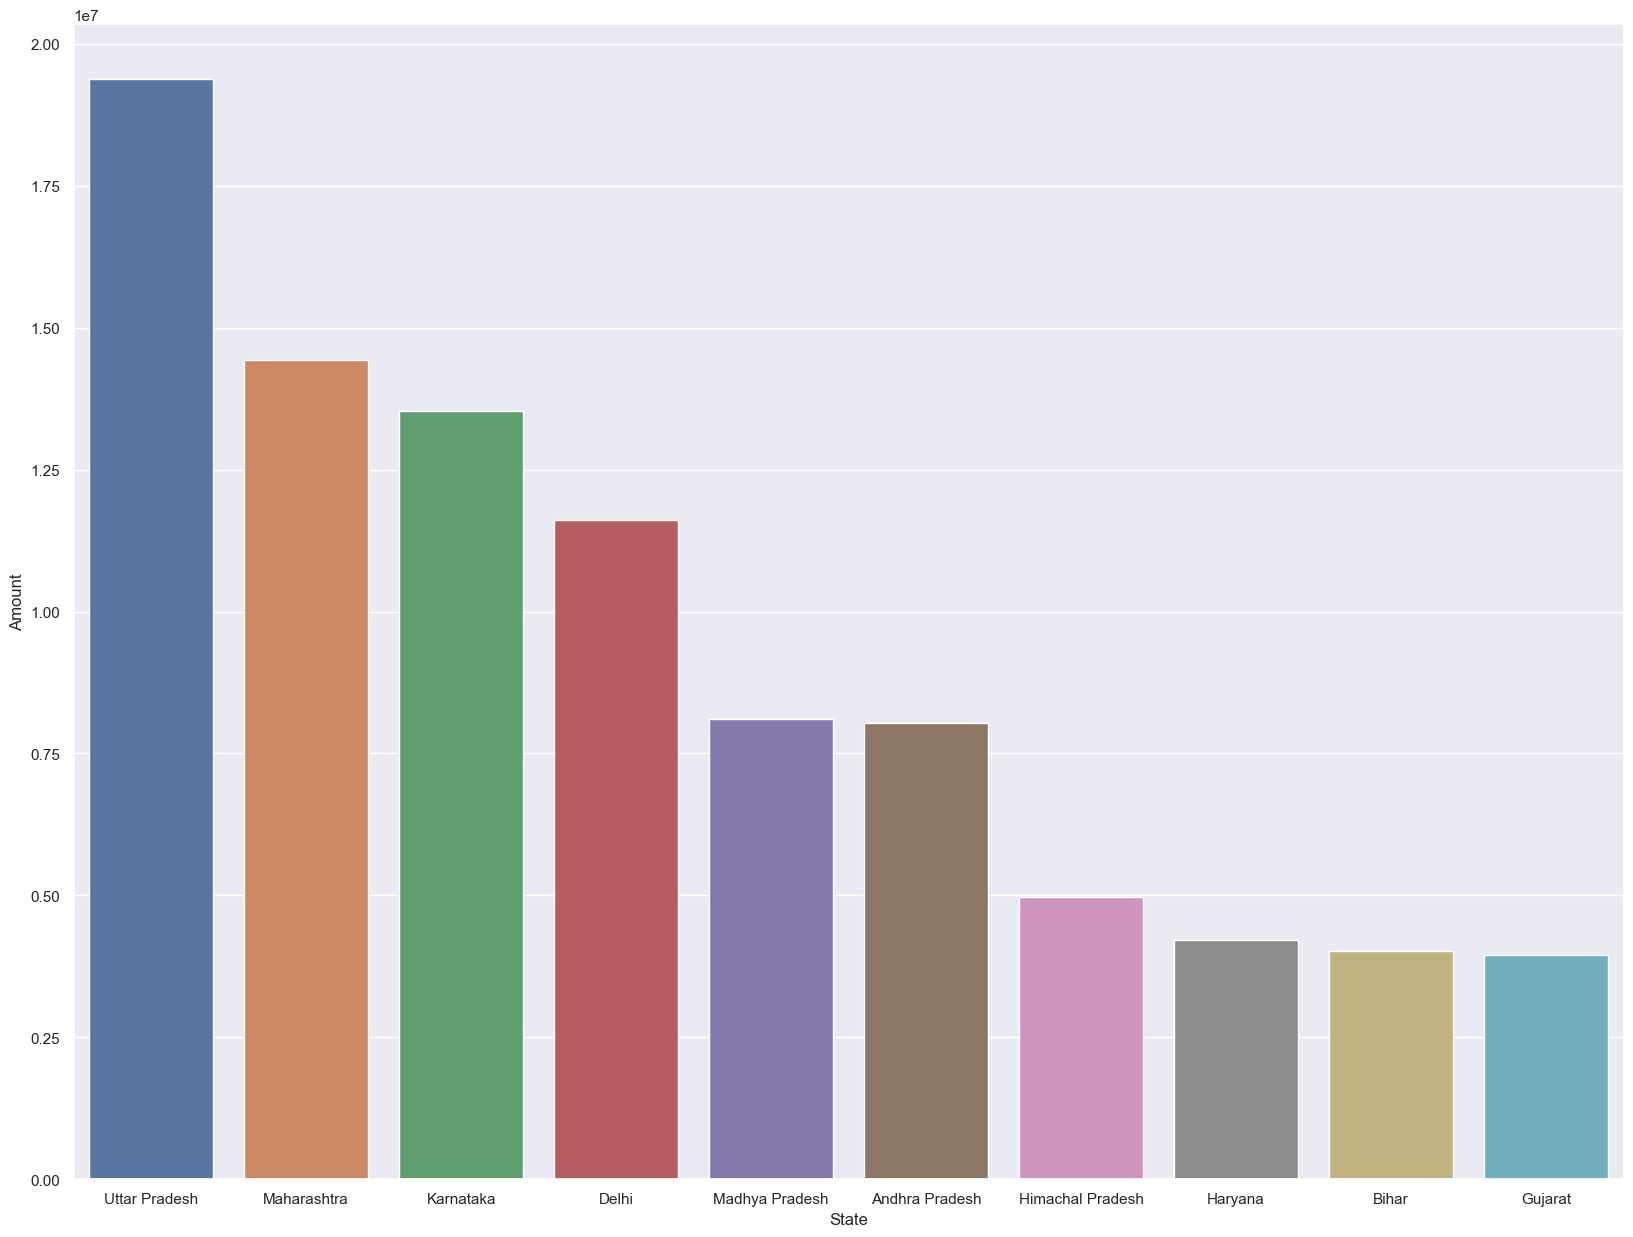

In [48]:
#plotting amount vs top 10 state graph
amt_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x='State',y='Amount',data = amt_state)

This graph shows that people from Uttar Pradesh, Maharashtra , and Karnataka spends the most money

<AxesSubplot: xlabel='Marital_Status', ylabel='Amount'>

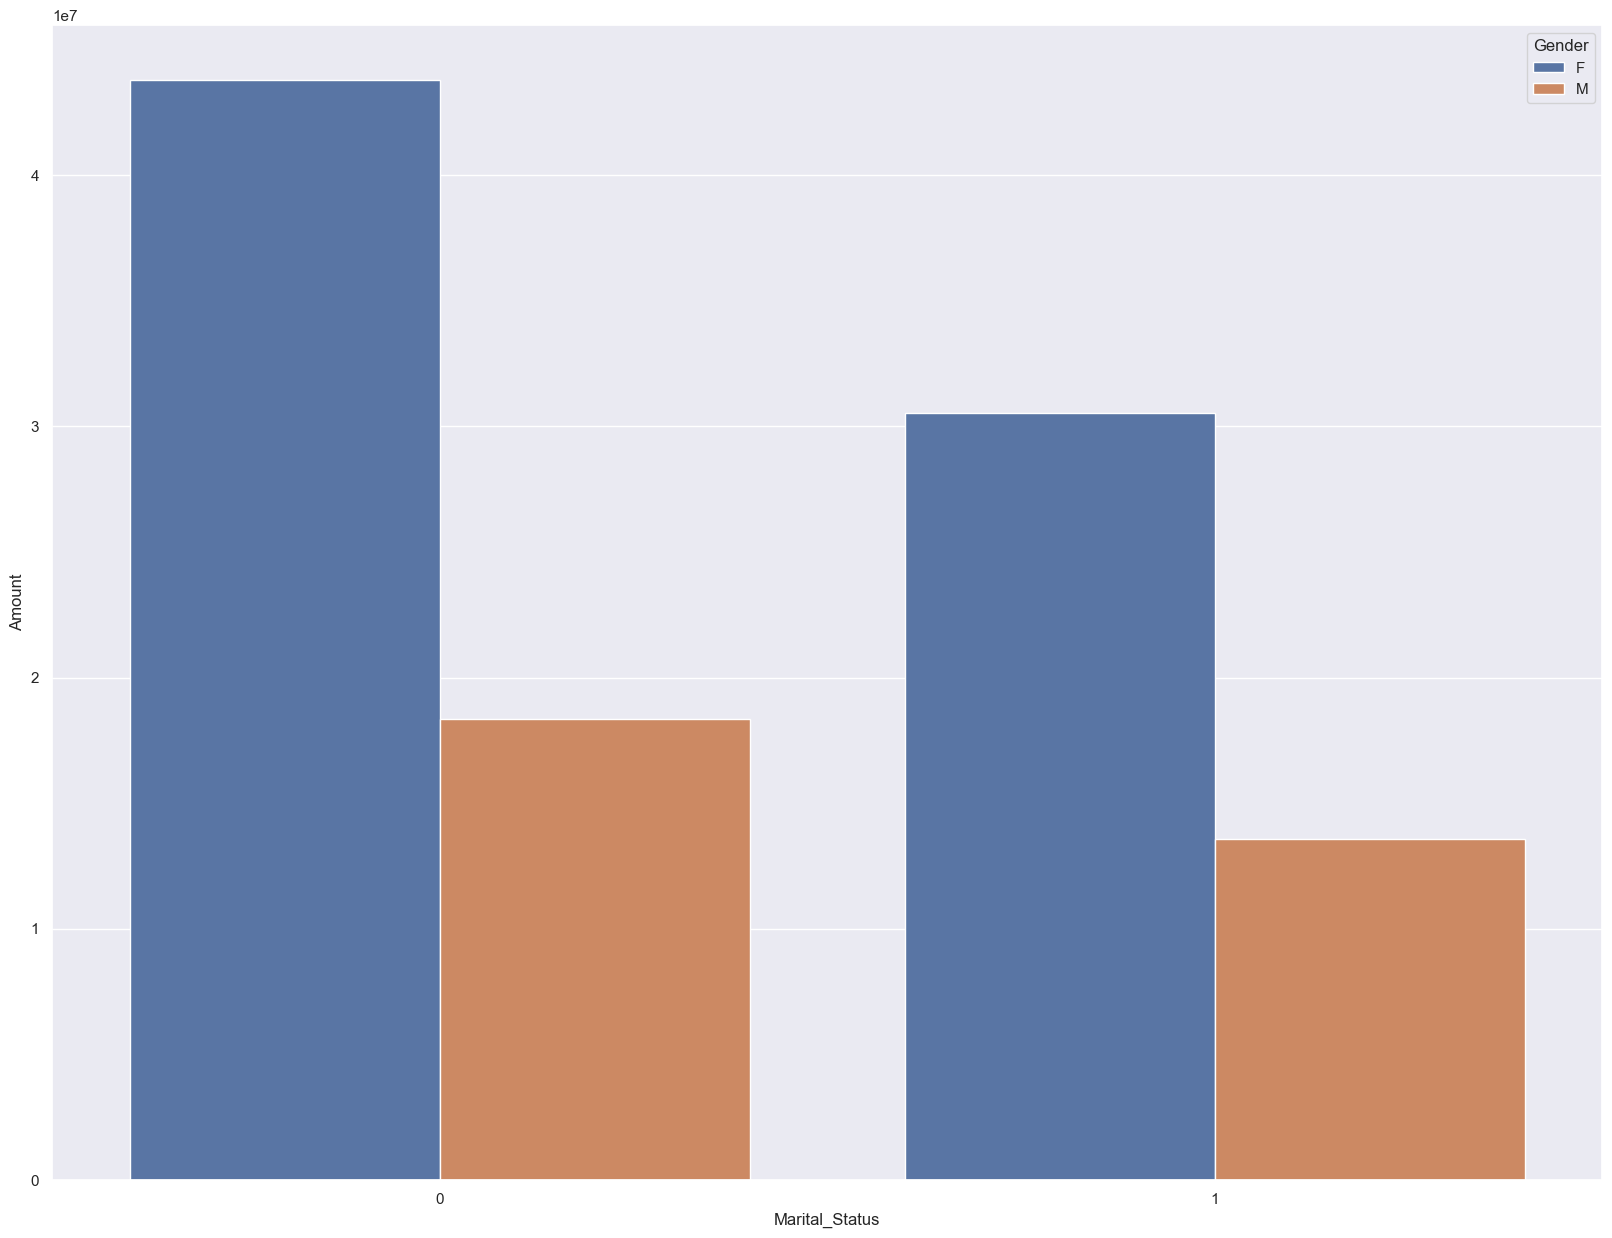

In [49]:
#plotting marital status vs amount graph
ms_amount = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=ms_amount,hue='Gender')

This graph shows that unmarried women spends the most money

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

<AxesSubplot: xlabel='Occupation', ylabel='Amount'>

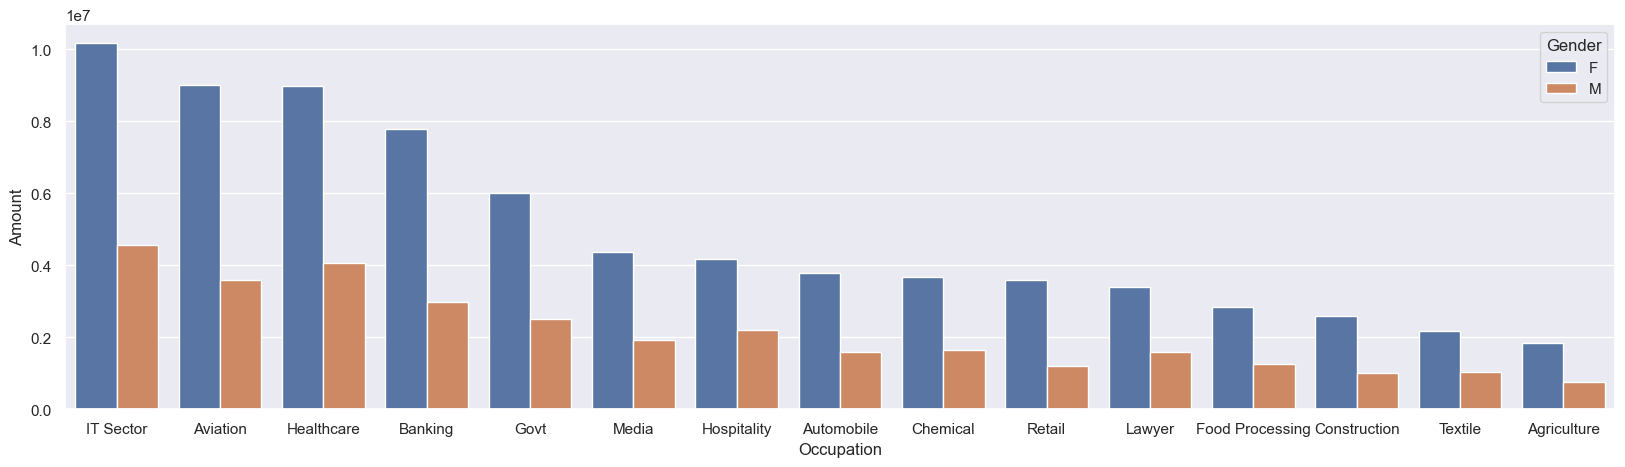

In [50]:
#plotting occupation vs amount graph
oc_amt = df.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data = oc_amt,hue='Gender')

This graph shows that people from IT Sector, Aviation, and Healthcare are most likely to buy a product

<AxesSubplot: xlabel='Product_Category', ylabel='Amount'>

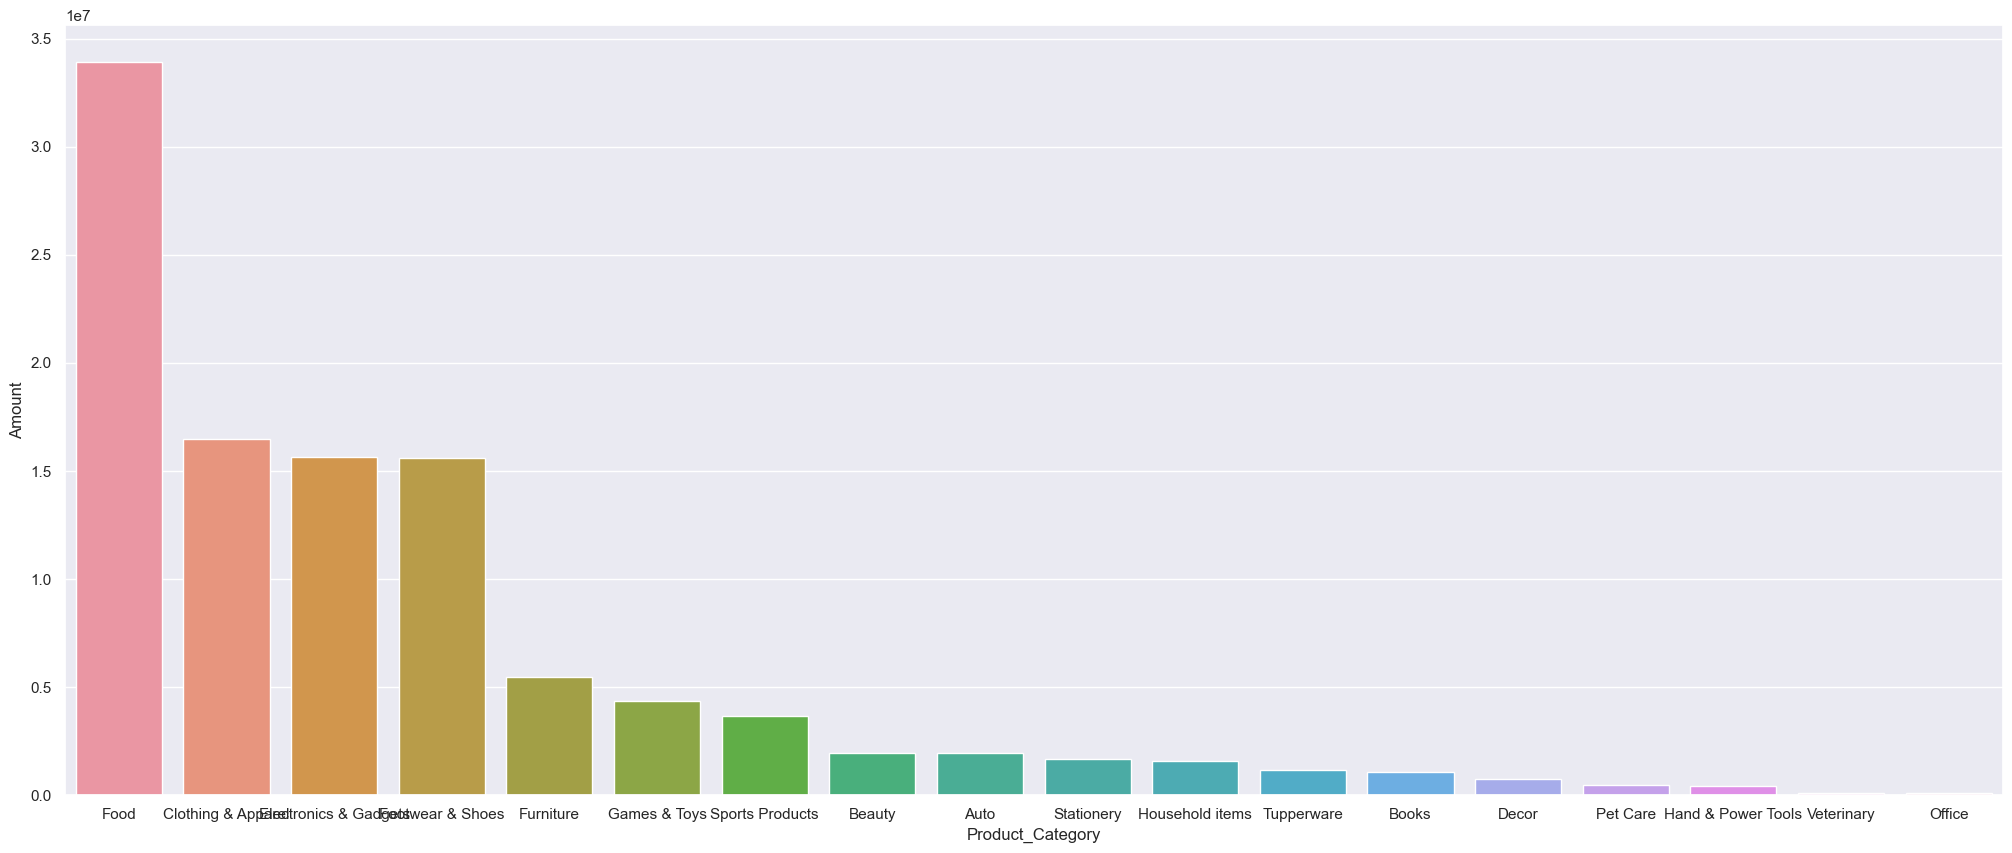

In [43]:
#plotting graphs of product category vs amount
pc_amt= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='Product_Category',y='Amount',data = pc_amt)

This graph shows that people tends to buy Food , Clothing and Appliances more

<AxesSubplot: xlabel='Product_ID', ylabel='Amount'>

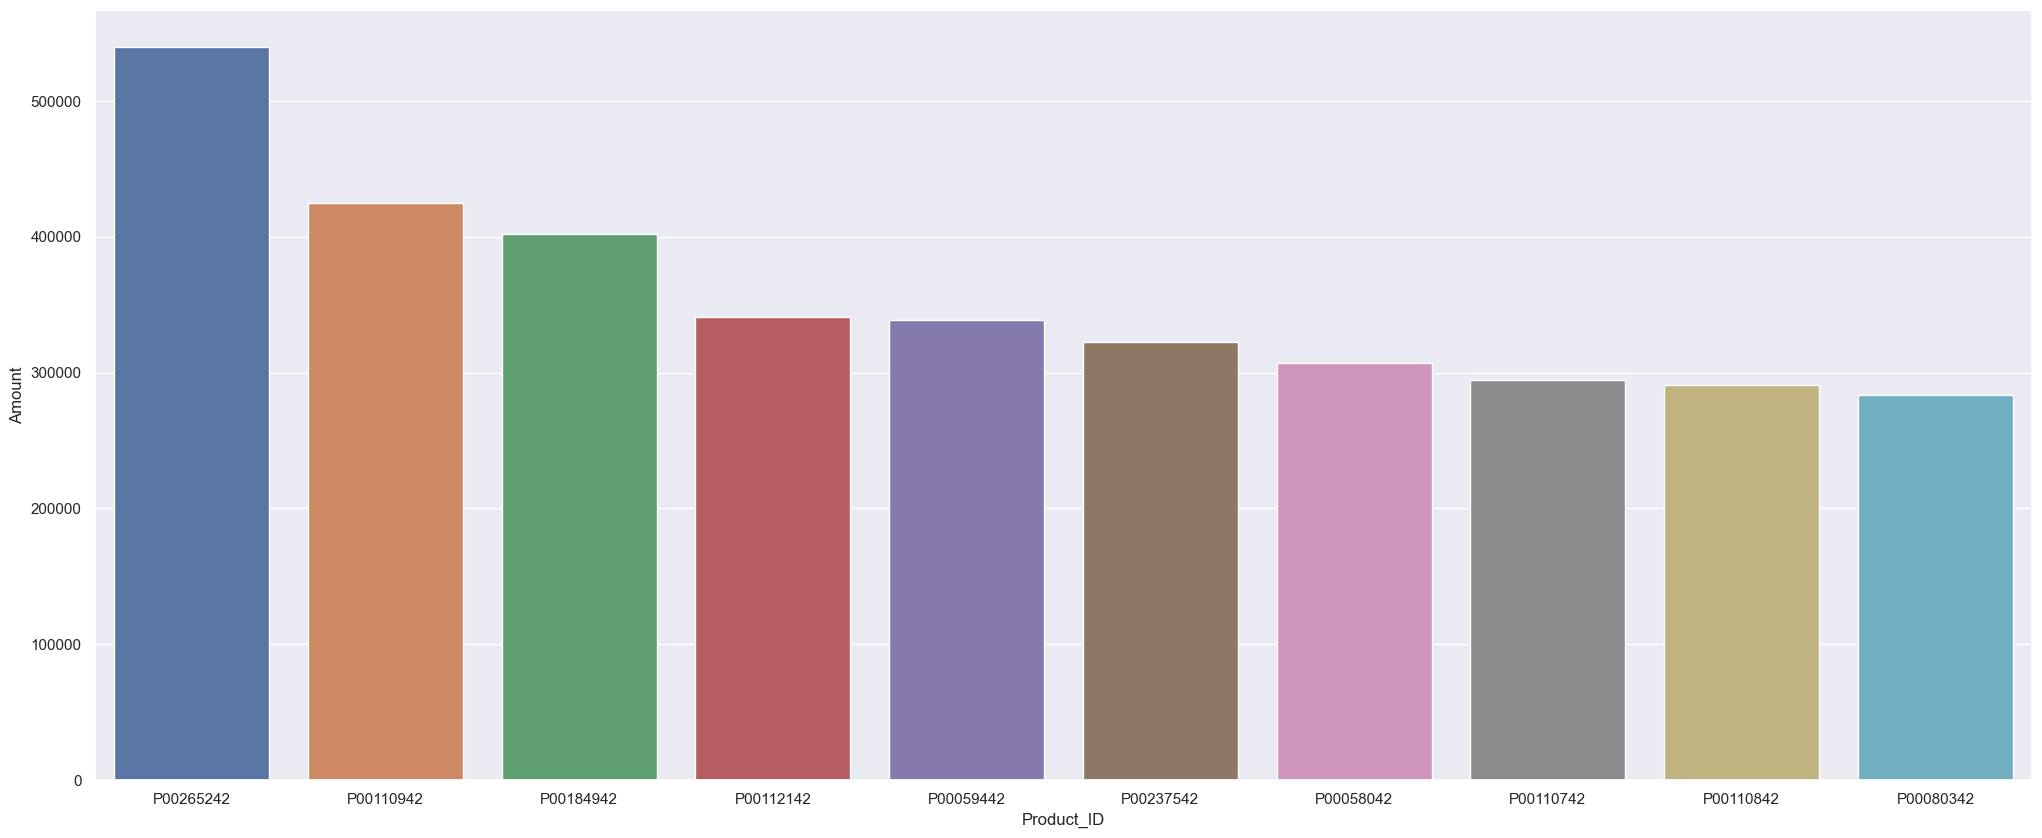

In [46]:
pcid_amt= df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='Product_ID',y='Amount',data = pcid_amt)

This graph shows that the most sold products are P00265242,P00110942,P00112142

Conclusion:-
Women between the age of 26-35 from UP , Maharashtra and Karntaka working in IT Sector, Aviation Ministry and Healthcare are most likely to buy food products, clothing and appliances, electronics and gadgets